# Import

In [723]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import numpy as np
import pandas as pd

import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

# import seaborn as sns
import seaborn as sns

# importing the statistics module
import statistics

import joblib


In [268]:
# read fold for check
f1 = pd.read_csv("../5-fold_new/fold1.csv")
f2 = pd.read_csv("../5-fold_new/fold2.csv")
f3 = pd.read_csv("../5-fold_new/fold3.csv")
f4 = pd.read_csv("../5-fold_new/fold4.csv")
f5 = pd.read_csv("../5-fold_new/fold5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [269]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [270]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [271]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print(le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print(le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print(le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print(le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print(le.classes_)

['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']


In [272]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 39
f1 negative: 52
------------------
f2 positive: 38
f2 negative: 53
------------------
f3 positive: 25
f3 negative: 66
------------------
f4 positive: 19
f4 negative: 72
------------------
f5 positive: 23
f5 negative: 68
------------------


# Define function

In [273]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [649]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [275]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [276]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [277]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [278]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

# Setting

In [735]:
# setting split and path
split = 'split5'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [736]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../5-fold_new/DATA//split5/train/train_split5.csv
../5-fold_new/DATA//test.csv
../5-fold_new/DATA//split5/val/val_split5.csv


In [737]:
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [738]:
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [739]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [740]:
# # Load the raw set
# x_raw = raw_data[raw_data.columns[2:]]
# y_raw = raw_data[raw_data.columns[1]]
# le = LabelEncoder()
# y_raw = np.array(le.fit_transform(y_raw))
# print(le.classes_)

In [741]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split5
train positive:    121
validate positive: 23


In [742]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [743]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [744]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [745]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print(" * Test difference: {}".format(abs(len(test_dataset) - (2*count_test))))
print("####################################")

######### Check balance! ##########
split5
Train have abnormal: 121
Train have normal: 243
 * Train difference: 122
Validate have abnormal: 23
Validate have normal: 68
 * Validate difference: 45
Test have abnormal: 68
Test have normal: 46
 * Test difference: 22
####################################


In [746]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_val = sc.fit_transform(x_val)

In [618]:
# Define parameter grid
param_grid = {'loss': ['hinge', 'modified_huber', 'log_loss'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.001, 0.01, 0.1, 1.0],
              'max_iter': [1000, 2000, 5000],
              'alpha': [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1]}

# Define SGD model
sgd_model = SGDClassifier()

# Define grid search object
grid_search = GridSearchCV(sgd_model, param_grid, cv=5)

# Fit grid search object to the data
grid_search.fit(x_val, y_val)

loss = grid_search.best_params_['loss']
penalty = grid_search.best_params_['penalty']
learning_rate = grid_search.best_params_['learning_rate']
eta0 = grid_search.best_params_['eta0']
max_iter = grid_search.best_params_['max_iter']
alpha = grid_search.best_params_['alpha']

# Split 1

In [499]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: elasticnet
Best learning_rate parameter: optimal
Best eta0 parameter: 0.001
Best max_iter parameter: 1000
Best alpha parameter: 1e-07
Best score: 0.9888888888888889


In [604]:
# create the individual models
sgd_model = SGDClassifier(loss=loss, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, alpha=alpha)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-07, eta0=1.0, learning_rate='adaptive',
              penalty='elasticnet')

In [665]:
model_path = "../SGD/models/sgd_model_{}.pkl".format(split)

In [501]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/sgd_model_split1.pkl']

In [666]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

split1
############## validate set ################
Confusion Matrix
----------------
[[51  1]
 [ 6 33]] 

----------------
Sensitivity: 84.62%
Specificity: 98.08%
Accuracy: 92.31%
Precision: 97.06%
Sensitivity: 84.62%
Precision: 97.06%
F1: 90.41%


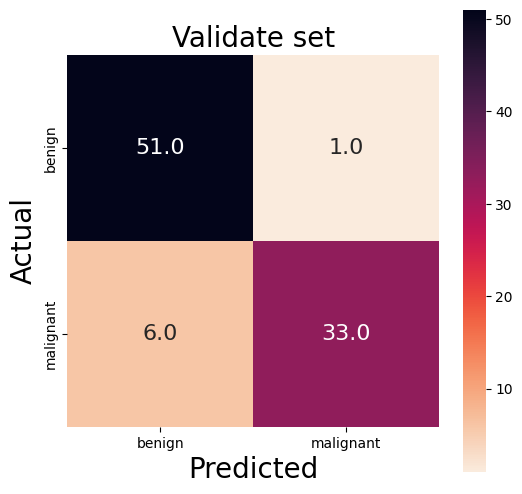

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [15 53]] 

----------------
Sensitivity: 77.94%
Specificity: 100.00%
Accuracy: 86.84%
Precision: 100.00%
Sensitivity: 77.94%
Precision: 100.00%
F1: 87.60%


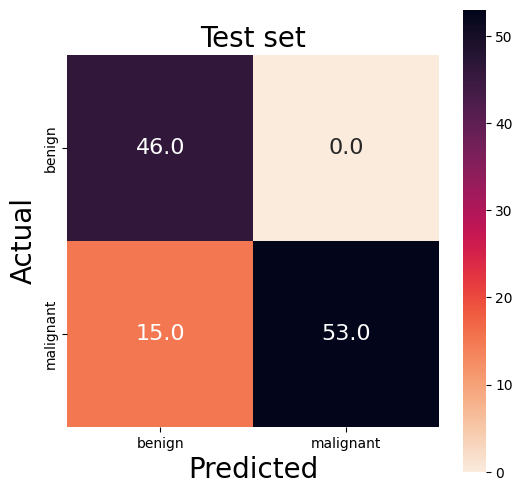

---------------------------------------
AUC validate: 0.9135
AUC test: 0.8897


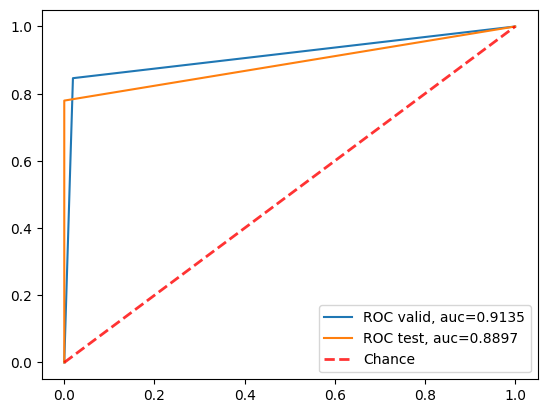

In [675]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc_val = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc_test_split1 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# Split 2

In [516]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: l2
Best learning_rate parameter: invscaling
Best eta0 parameter: 0.01
Best max_iter parameter: 1000
Best alpha parameter: 1e-06
Best score: 0.9777777777777779


In [517]:
# create the individual models
sgd_model = SGDClassifier(loss=loss, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, alpha=alpha)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-06, eta0=0.01, learning_rate='invscaling')

In [678]:
model_path = "../SGD/models/sgd_model_{}.pkl".format(split)

In [518]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/sgd_model_split2.pkl']

In [679]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

split2
############## validate set ################
Confusion Matrix
----------------
[[52  0]
 [ 4 35]] 

----------------
Sensitivity: 89.74%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.74%
Precision: 100.00%
F1: 94.59%


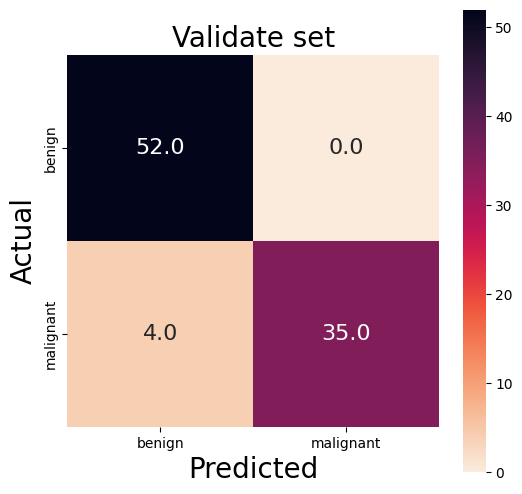

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [21 47]] 

----------------
Sensitivity: 69.12%
Specificity: 100.00%
Accuracy: 81.58%
Precision: 100.00%
Sensitivity: 69.12%
Precision: 100.00%
F1: 81.74%


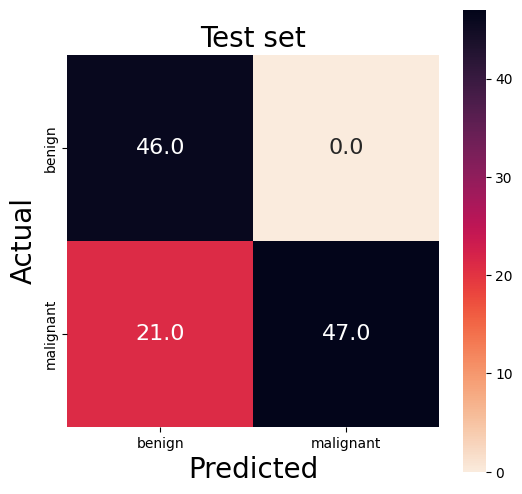

---------------------------------------
AUC validate: 0.9487
AUC test: 0.8456


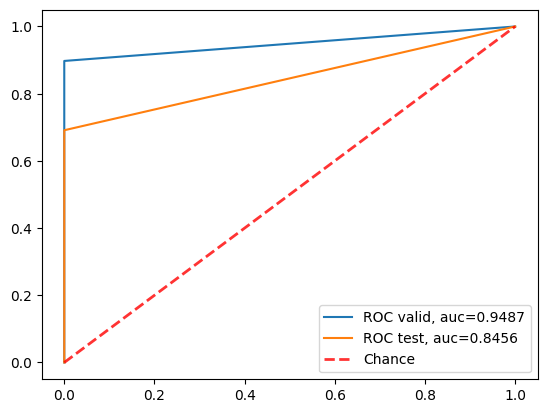

In [680]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc_val = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc_test_split2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# split 3

In [533]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: modified_huber
Best penalty parameter: l1
Best learning_rate parameter: invscaling
Best eta0 parameter: 0.1
Best max_iter parameter: 1000
Best alpha parameter: 1e-05
Best score: 0.9894736842105264


In [534]:
# create the individual models
sgd_model = SGDClassifier(loss=loss, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, alpha=alpha)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-05, eta0=0.1, learning_rate='invscaling',
              loss='modified_huber', penalty='l1')

In [682]:
model_path = "../SGD/models/sgd_model_{}.pkl".format(split)

In [535]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/sgd_model_split3.pkl']

In [683]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

split3
############## validate set ################
Confusion Matrix
----------------
[[52  0]
 [ 2 37]] 

----------------
Sensitivity: 94.87%
Specificity: 100.00%
Accuracy: 97.80%
Precision: 100.00%
Sensitivity: 94.87%
Precision: 100.00%
F1: 97.37%


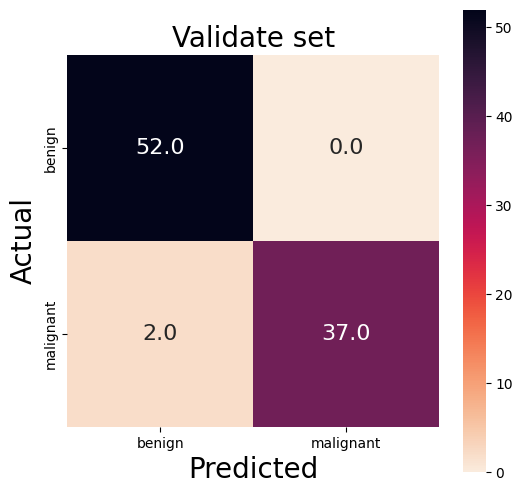

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [20 48]] 

----------------
Sensitivity: 70.59%
Specificity: 100.00%
Accuracy: 82.46%
Precision: 100.00%
Sensitivity: 70.59%
Precision: 100.00%
F1: 82.76%


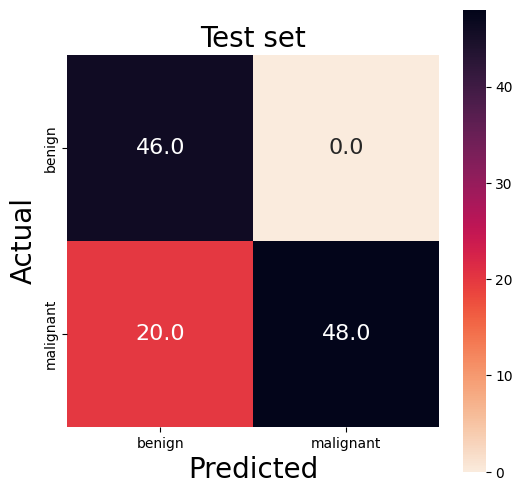

---------------------------------------
AUC validate: 0.9744
AUC test: 0.8529


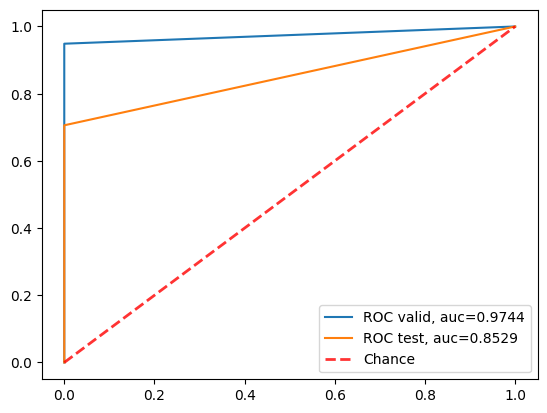

In [684]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc_val = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc_test_split3 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# split 4

In [550]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: log_loss
Best penalty parameter: l1
Best learning_rate parameter: adaptive
Best eta0 parameter: 1.0
Best max_iter parameter: 2000
Best alpha parameter: 1e-07
Best score: 1.0


In [551]:
# create the individual models
sgd_model = SGDClassifier(loss=loss, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, alpha=alpha)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-07, eta0=1.0, learning_rate='adaptive', loss='log_loss',
              max_iter=2000, penalty='l1')

In [686]:
model_path = "../SGD/models/sgd_model_{}.pkl".format(split)

In [552]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/sgd_model_split4.pkl']

In [687]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

split4
############## validate set ################
Confusion Matrix
----------------
[[52  0]
 [ 3 36]] 

----------------
Sensitivity: 92.31%
Specificity: 100.00%
Accuracy: 96.70%
Precision: 100.00%
Sensitivity: 92.31%
Precision: 100.00%
F1: 96.00%


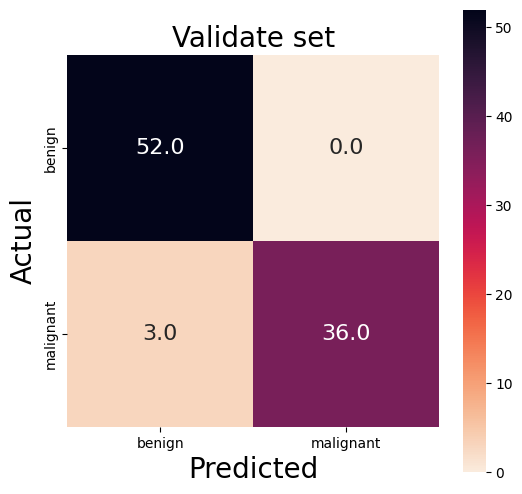

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [13 55]] 

----------------
Sensitivity: 80.88%
Specificity: 100.00%
Accuracy: 88.60%
Precision: 100.00%
Sensitivity: 80.88%
Precision: 100.00%
F1: 89.43%


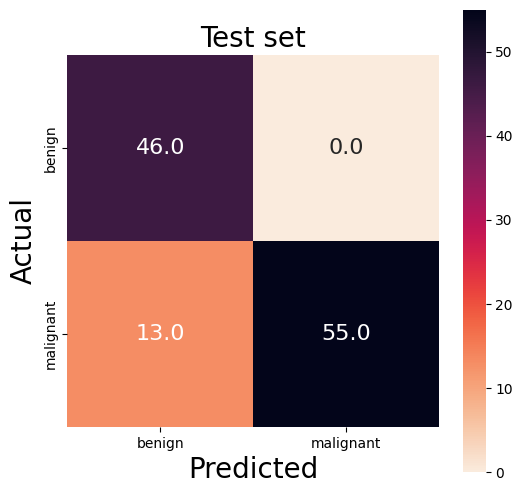

---------------------------------------
AUC validate: 0.9615
AUC test: 0.9044


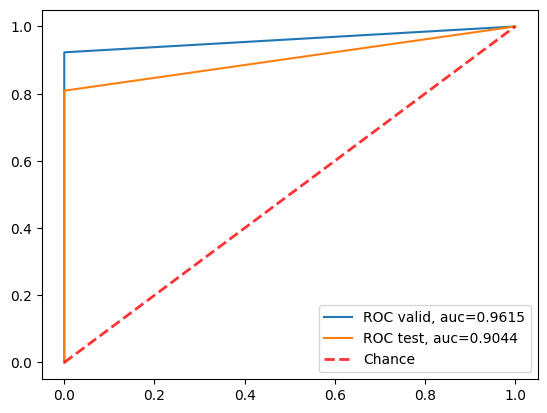

In [688]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc_val = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc_test_split4 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# split 5

In [578]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: elasticnet
Best learning_rate parameter: adaptive
Best eta0 parameter: 1.0
Best max_iter parameter: 1000
Best alpha parameter: 1e-07
Best score: 0.9894736842105264


In [579]:
# create the individual models
sgd_model = SGDClassifier(loss=loss, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, alpha=alpha)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-07, eta0=1.0, learning_rate='adaptive',
              penalty='elasticnet')

In [747]:
model_path = "../SGD/models/sgd_model_{}.pkl".format(split)

In [580]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/sgd_model_split5.pkl']

In [748]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

split5
############## validate set ################
Confusion Matrix
----------------
[[65  3]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 95.59%
Accuracy: 96.70%
Precision: 88.46%
Sensitivity: 100.00%
Precision: 88.46%
F1: 93.88%


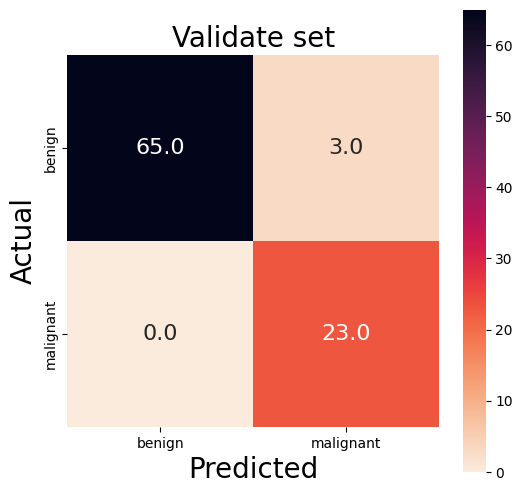

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [14 54]] 

----------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       1.00      0.79      0.89        68

    accuracy                           0.88       114
   macro avg       0.88      0.90      0.88       114
weighted avg       0.91      0.88      0.88       114

Sensitivity: 79.41%
Specificity: 100.00%
Accuracy: 87.72%
Precision: 100.00%
Sensitivity: 79.41%
Precision: 100.00%
F1: 88.52%


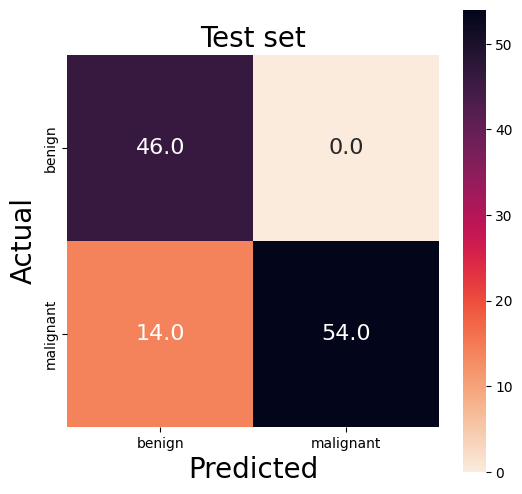

---------------------------------------
AUC validate: 0.9779
AUC test: 0.8971


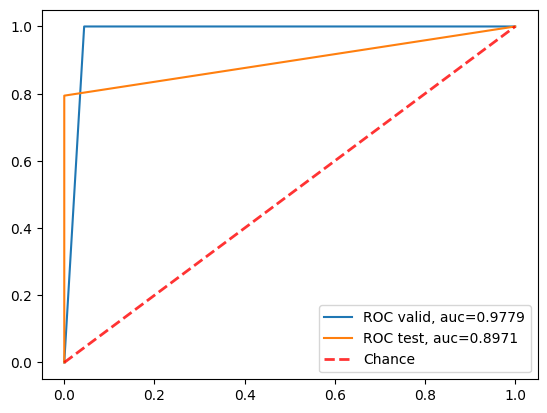

In [750]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc_val = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc_test_split5 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
    
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix]))
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix]))
# thresholds_ = thr[ix]
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3))
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4))
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
##########################################################

# Overall

In [698]:
test_split1 = np.array([[46, 0], [15, 53]])
test_split2 = np.array([[46, 0], [21, 47]])
test_split3 = np.array([[46, 0], [20, 48]])
test_split4 = np.array([[46, 0], [13, 55]])
test_split5 = np.array([[46, 0], [14, 54]])

In [699]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[230   0]
 [ 83 257]]


Text(0.5, 81.72222222222219, 'Predicted')

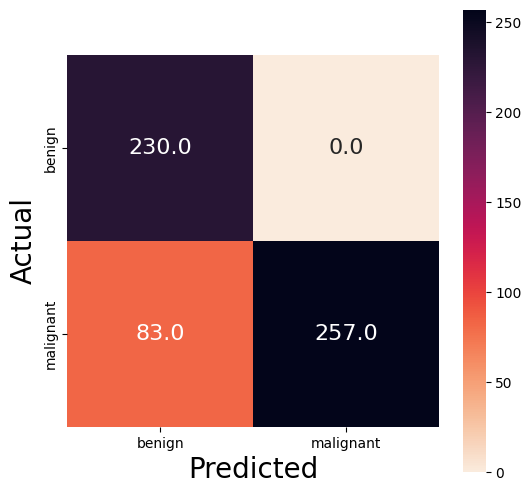

In [700]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [701]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Mean Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[77.94117647058823, 69.11764705882352, 70.58823529411765, 80.88235294117648, 79.41176470588235]
Mean Sensitivity: 75.58823529411765
Sensitivity Standard Deviation: 5.3631125084736695
Mean Sensitivity: 75.59 ± 5.36%


In [702]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Mean Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 100.0
Specificity Standard Deviation: 0.0
Mean Specificity: 100.00 ± 0.00%


In [703]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Mean accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[86.8421052631579, 81.57894736842105, 82.45614035087719, 88.59649122807018, 87.71929824561403]
Mean accuracy: 85.43859649122807
accuracy Standard Deviation: 3.199049566457977
Mean accuracy: 85.44 ± 3.20%


In [704]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Mean precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean precision: 100.0
precision Standard Deviation: 0.0
Mean precision: 100.00 ± 0.00%


In [705]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Mean f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[87.60330578512396, 81.7391304347826, 82.75862068965517, 89.4308943089431, 88.52459016393443]
Mean f1: 86.01130827648785
f1 Standard Deviation: 3.5134061320649512
Mean f1: 86.01 ± 3.51%


In [706]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean Specificity:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Mean auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.8897058823529411, 0.8455882352941176, 0.8529411764705883, 0.9044117647058824, 0.8970588235294117]
Mean Specificity: 0.8779411764705882
auc Standard Deviation: 0.026815562542368304
Mean auc: 0.88 ± 0.03%
